1. Detect the squares that bounds each single dice
2. For each of these squares, detect the dots that are inside and count them

In [268]:
import numpy as np
import os
import cv2
from matplotlib import pylab as plt 
from ipywidgets import interact

Images before Canny

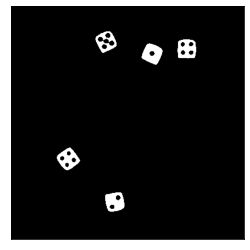

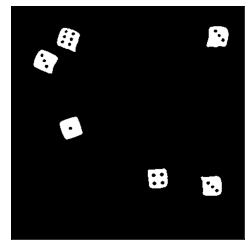

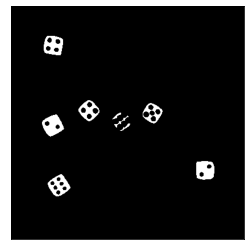

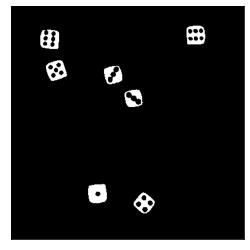

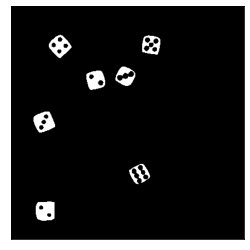

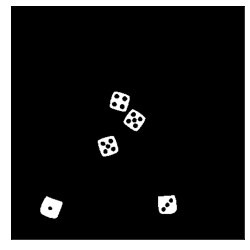

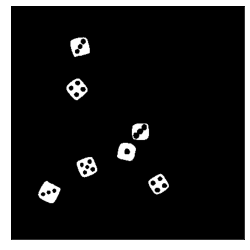

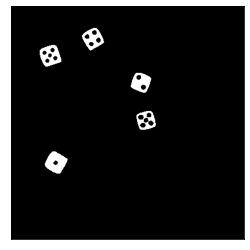

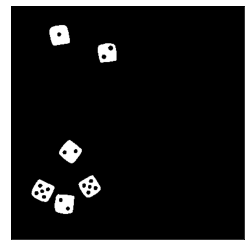

In [269]:
#directory = r'./images'
directory = r'./dices/selected-dataset-images'
#directory = r'./dices/board-game-dices'
#directory = r'./dices/selected-board-game-dices'

dices = []
original_dices = []
i = 0
for dice_image in os.scandir(directory):
    dices.append(dice_image.path)
    
    plt.figure(figsize=(30, 30))

    img = cv2.imread(dices[i])
    original_dices.append(img)
    
    # 0. Change colorscale to gray
    imggrayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 1. Blurring dices to remove sharp edges
    blur = cv2.blur(imggrayscale, (4, 4), 0)
    #dices[i] = cv2.blur(imggrayscale, (4, 4), 0)

    # 2. Threshold
    _, dices[i] = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY)
    
    ax = plt.subplot(6, 3, i+1)
    ax.imshow(dices[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])
    
    i += 1
    

In [270]:

@interact(blur_edge=(2, 5, 1), thresh=(0, 250, 10), canny=(100, 540, 10))
def func(blur_edge, thresh, canny):
    dices = []
    original_dices = []
    i = 0
    for dice_image in os.scandir(directory):
        dices.append(dice_image.path)
        
        plt.figure(figsize=(30, 30))

        img = cv2.imread(dices[i])
        original_dices.append(img)
        
        # 0. Change colorscale to gray
        imggrayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # 1. Blurring dices to remove sharp edges
        blur = cv2.blur(imggrayscale, (blur_edge, blur_edge), 0)
        
        # 2. Threshold
        _, thresholded = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)
        
        # 3. Canny filter to detect edges 
        dices[i] = cv2.Canny(thresholded, canny, 550)
    
        ax = plt.subplot(6, 3, i+1)
        ax.imshow(dices[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.axis([0, img.shape[1], img.shape[0], 0])
        
        i += 1
        
        
    #dices

interactive(children=(IntSlider(value=3, description='blur_edge', max=5, min=2), IntSlider(value=120, descript…

1. Finding contours.
2. Finding the minimum area rectangles that enclose all the points of each contours.

In [271]:
def plot_histogram(data, min_area, max_area):
    
    histo, x = np.histogram(img, range(0, 256), density=True)
    plot(histo)
    xlim(0, 255)

In [272]:
# lowest point of the rectangle will always be the first sub list of box ndarray
# the next sub-list will always represent the point that you first get when you move in the clockwise direction


# TODO: def is_inside(box1, box2):
    
    

In [273]:
# TODO: count dots inside a single dice
# TODO: count how many dices are there


In [274]:
# Returns the centre point of box
# def centre_of_box(box):
    

[array([[172, 353],
       [178, 347],
       [184, 353],
       [178, 359]])]
[array([[181, 337],
       [188, 330],
       [194, 336],
       [187, 343]])]
[array([[ 93, 279],
       [ 98, 273],
       [104, 279],
       [ 98, 284]])]
[array([[104, 270],
       [110, 265],
       [116, 271],
       [110, 276]])]
[array([[ 84, 268],
       [ 90, 262],
       [ 95, 267],
       [ 89, 273]])]
[array([[ 96, 259],
       [101, 253],
       [107, 259],
       [101, 264]])]
[array([[241,  83],
       [248,  77],
       [254,  83],
       [248,  90]])]
[array([[311,  81],
       [317,  75],
       [322,  81],
       [316,  87]])]
[array([[296,  81],
       [302,  76],
       [308,  82],
       [302,  87]])]
[array([[310,  67],
       [316,  61],
       [322,  67],
       [316,  73]])]
[array([[296,  67],
       [302,  62],
       [307,  67],
       [302,  73]])]
[array([[157,  71],
       [164,  65],
       [170,  71],
       [164,  78]])]
[array([[150,  61],
       [154,  51],
       [183, 

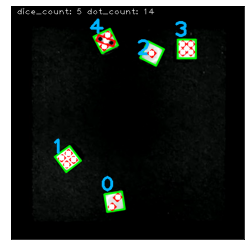

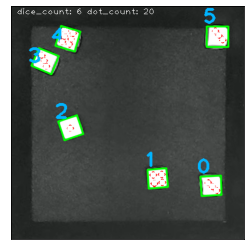

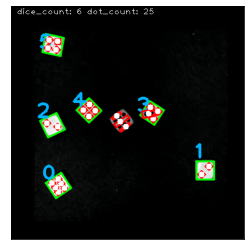

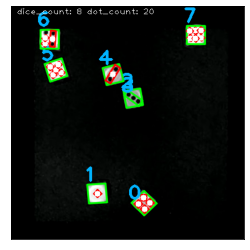

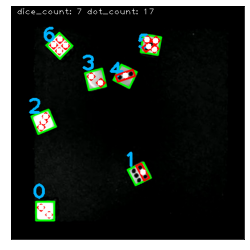

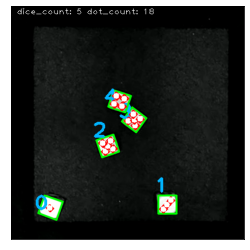

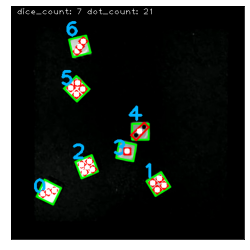

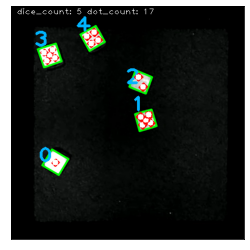

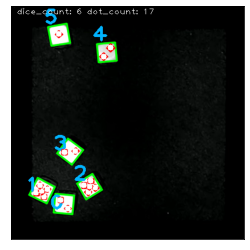

In [275]:
i = 0
dice_areas = []
for dice_image, original in zip(dices, original_dices):
    
    plt.figure(figsize=(30, 30))
   
    # 4. Finding contours of an image.
    contours, hierarchy = cv2.findContours(dice_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #print(hierarchy)

    # 5. Calculating areas of found contours.
    areas = []
    boxes_with_points = [] 
    for contour in contours:
        _, _, width, height = cv2.boundingRect(contour)
        #boxes_with_points.append(cv2.boxPoints(contour))
        areas.append(width*height)
        
    dice_areas.append(areas)
    # print(max(areas), min(areas))
    # print(areas)
    # print(len(areas))
    

    # 6.0 Checking if dots are inside dices boxes
    #  [Next, Previous, First_Child, Parent]
    for contour in hierarchy[0][0]:
        pass

    # 6.1 Using average as a middle point to differ between dots and dices boxes
    labels = []
    middle = (max(areas) - min(areas)) / 2
    #print(middle)
    for area in areas:
    
        if area > middle:
            labels.append('kostka')
        else: 
            labels.append('oczko')

    
    dice_count = 0
    dot_count = 0
    for contour, label in zip(contours, labels):
        
         # 7. Drawing contours according to labels.
        rectangle = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rectangle)
        box = np.int0(box)
        
        if label == 'kostka':
            cv2.drawContours(original, [box], -1, (0, 255, 0), 2,  cv2.LINE_AA)
            # id of dice
            cv2.putText(original, str(dice_count), (box[0][0] - 7, box[0][1] - 5), cv2.FONT_HERSHEY_PLAIN, 2.5, (0, 180, 255), 3)
            dice_count += 1
            
            
        elif label == 'oczko':
            cv2.drawContours(original, [box], -1, (255, 0, 0), 2,  cv2.LINE_AA)
            
            # finding centroids of dots
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(original, (cX, cY), 5, (255, 255, 255), -1)
            
            dot_count += 1
            
    # 8. Put dice count and dot count text on a black image
    cv2.putText(original, "dice_count: "+ str(dice_count) + " dot_count: "+ str(dot_count), (10,15), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255))
            
    ax = plt.subplot(6, 3, i+1)
    ax.imshow(original)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, original.shape[1], original.shape[0], 0])
    print("dice_count: ", dice_count, " dot_count: ", dot_count)
    

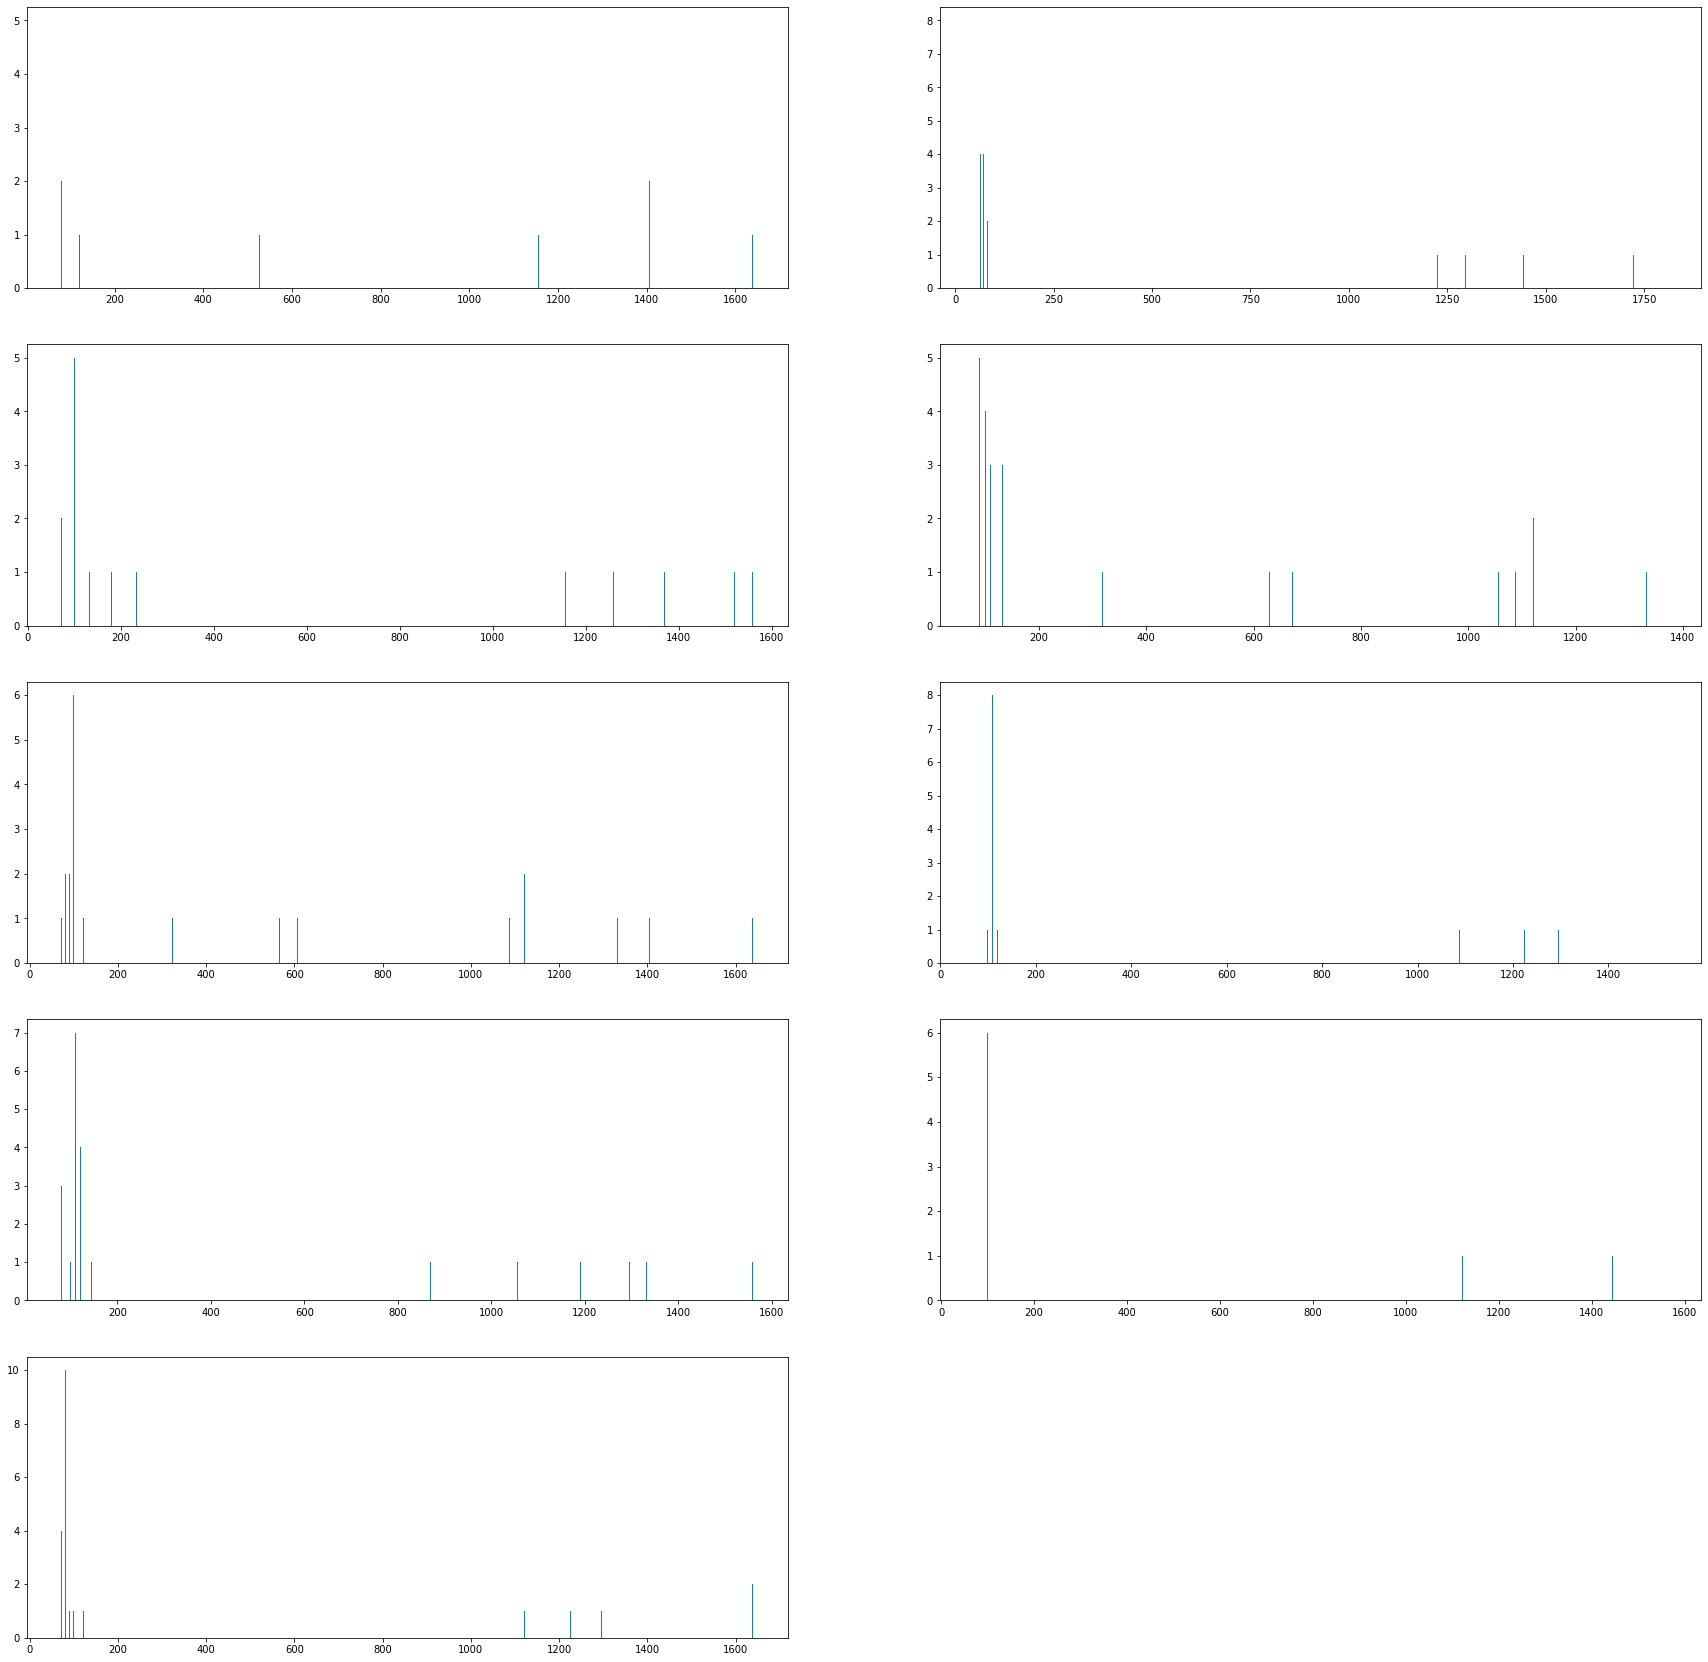

In [276]:
plt.figure(figsize=(30, 30))
i = 0
for area in dice_areas:
    
    ax1 = plt.subplot(5, 2, i+1)
    ax1.hist(area, bins=1000)
    i += 1
    
    